## Numerical Optimization for Logistic Regression.

#### 1.1. Load the data

In [1]:
from sklearn import datasets
import numpy

x_sparse, y = datasets.load_svmlight_file('diabetes')
x = x_sparse.todense()

print('Shape of x: ' + str(x.shape))
print('Shape of y: ' + str(y.shape))

Shape of x: (768, 8)
Shape of y: (768,)


#### 1.2. Partition to training and test sets

In [2]:
# partition the data to training and test sets
n = x.shape[0]
n_train = 640
n_test = n - n_train

rand_indices = numpy.random.permutation(n)
train_indices = rand_indices[0:n_train]
test_indices = rand_indices[n_train:n]

x_train = x[train_indices, :]
x_test = x[test_indices, :]
y_train = y[train_indices].reshape(n_train, 1)
y_test = y[test_indices].reshape(n_test, 1)

print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (640, 8)
Shape of x_test: (128, 8)
Shape of y_train: (640, 1)
Shape of y_test: (128, 1)


#### 1.3. Feature scaling

In [3]:
# Standardization
import numpy

# calculate mu and sig using the training set
d = x_train.shape[1]
mu = numpy.mean(x_train, axis=0).reshape(1, d)
sig = numpy.std(x_train, axis=0).reshape(1, d)

# transform the training features
x_train = (x_train - mu) / (sig + 1E-6)

# transform the test features
x_test = (x_test - mu) / (sig + 1E-6)

print('test mean = ')
print(numpy.mean(x_test, axis=0))

print('test std = ')
print(numpy.std(x_test, axis=0))

test mean = 
[[ 0.02160114 -0.0045921   0.02427443 -0.14950559 -0.06461667  0.00538388
   0.07789117 -0.0967077 ]]
test std = 
[[0.94131385 1.05700898 0.94934615 0.93162485 0.78396497 1.09694917
  1.07093478 0.91484109]]


#### 1.4. Add a dimension of all ones

In [4]:
n_train, d = x_train.shape
x_train = numpy.concatenate((x_train, numpy.ones((n_train, 1))), axis=1)

n_test, d = x_test.shape
x_test = numpy.concatenate((x_test, numpy.ones((n_test, 1))), axis=1)

print('Shape of x_train: ' + str(x_train.shape))
print('Shape of x_test: ' + str(x_test.shape))

Shape of x_train: (640, 9)
Shape of x_test: (128, 9)


#### 2. Logistic regression model

In [5]:
# Calculate the objective function value
# Inputs:
#     w: d-by-1 matrix
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     objective function value (scalar)
def objective(w, x, y, lam):
    n, d = x.shape
    yx = numpy.multiply(y, x) # n-by-d matrix
    yxw = numpy.dot(yx, w) # n-by-1 matrix
    vec1 = numpy.exp(-yxw) # n-by-1 matrix
    vec2 = numpy.log(1 + vec1) # n-by-1 matrix
    loss = numpy.mean(vec2) # scalar
    reg = lam / 2 * numpy.sum(w * w) # scalar
    return loss + reg



In [6]:
# initialize w
d = x_train.shape[1]
w = numpy.zeros((d, 1))

# evaluate the objective function value at w
lam = 1E-6
objval0 = objective(w, x_train, y_train, lam)
print('Initial objective function value = ' + str(objval0))

Initial objective function value = 0.6931471805599453


#### 3. Numerical optimization
#### 3.1. Gradient descent

In [7]:
# Calculate the gradient
# Inputs:
#     w: d-by-1 matrix
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
# Return:
#     g: g: d-by-1 matrix, full gradient
def gradient(w, x, y, lam):
    n, d = x.shape
    yx = numpy.multiply(y, x) # n-by-d matrix
    yxw = numpy.dot(yx, w) # n-by-1 matrix
    vec1 = numpy.exp(yxw) # n-by-1 matrix
    vec2 = numpy.divide(yx, 1+vec1) # n-by-d matrix
    vec3 = -numpy.mean(vec2, axis=0).reshape(d, 1) # d-by-1 matrix
    g = vec3 + lam * w
    return g

In [8]:
# Gradient descent for solving logistic regression
# Inputs:
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     stepsize: scalar
#     max_iter: integer, the maximal iterations
#     w: d-by-1 matrix, initialization of w
# Return:
#     w: d-by-1 matrix, the solution
#     objvals: a record of each iteration's objective value
def grad_descent(x, y, lam, stepsize, max_iter=100, w=None):
    n, d = x.shape
    objvals = numpy.zeros(max_iter) # store the objective values
    if w is None:
        w = numpy.zeros((d, 1)) # zero initialization
    
    for t in range(max_iter):
        objval = objective(w, x, y, lam)
        objvals[t] = objval
        print('Objective value at t=' + str(t) + ' is ' + str(objval))
        g = gradient(w, x, y, lam)
        w -= stepsize * g
    
    return w, objvals

In [9]:
# Run gradient descent

lam = 1E-6
stepsize = 1.0
w, objvals_gd = grad_descent(x_train, y_train, lam, stepsize)

Objective value at t=0 is 0.6931471805599453
Objective value at t=1 is 0.5879224692522423
Objective value at t=2 is 0.5454529142222948
Objective value at t=3 is 0.522861210866472
Objective value at t=4 is 0.5089041308442687
Objective value at t=5 is 0.49952807313779013
Objective value at t=6 is 0.49289517596166355
Objective value at t=7 is 0.48803728523638784
Objective value at t=8 is 0.48438960916541596
Objective value at t=9 is 0.48159830854518626
Objective value at t=10 is 0.479430047377577
Objective value at t=11 is 0.47772498363931504
Objective value at t=12 is 0.47637036169550323
Objective value at t=13 is 0.47528475693256317
Objective value at t=14 is 0.47440822473044536
Objective value at t=15 is 0.47369590920912164
Objective value at t=16 is 0.4731137713872405
Objective value at t=17 is 0.47263566293660225
Objective value at t=18 is 0.4722412795951464
Objective value at t=19 is 0.47191470384888506
Objective value at t=20 is 0.4716433506619295
Objective value at t=21 is 0.47141

#### 3.2. Stochastic gradient descent (SGD)

In [10]:
# Calculate the objective Q_i and the gradient of Q_i
# Inputs:
#     w: d-by-1 matrix
#     xi: 1-by-d matrix
#     yi: scalar
#     lam: scalar, the regularization parameter
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def stochastic_objective_gradient(w, xi, yi, lam):
    d = xi.shape[0]
    yx = yi * xi # 1-by-d matrix
    yxw = float(numpy.dot(yx, w)) # scalar
    
    # calculate objective function Q_i
    loss = numpy.log(1 + numpy.exp(-yxw)) # scalar
    reg = lam / 2 * numpy.sum(w * w) # scalar
    obj = loss + reg
    
    # calculate stochastic gradient
    g_loss = -yx.T / (1 + numpy.exp(yxw)) # d-by-1 matrix
    g = g_loss + lam * w # d-by-1 matrix
    
    return obj, g



In [11]:
# SGD for solving logistic regression
# Inputs:
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     stepsize: scalar
#     max_epoch: integer, the maximal epochs
#     w: d-by-1 matrix, initialization of w
# Return:
#     w: the solution
#     objvals: record of each iteration's objective value
def sgd(x, y, lam, stepsize, max_epoch=100, w=None):
    n, d = x.shape
    objvals = numpy.zeros(max_epoch) # store the objective values
    if w is None:
        w = numpy.zeros((d, 1)) # zero initialization
    
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = numpy.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        
        objval = 0 # accumulate the objective values
        for i in range(n):
            xi = x_rand[i, :] # 1-by-d matrix
            yi = float(y_rand[i, :]) # scalar
            obj, g = stochastic_objective_gradient(w, xi, yi, lam)
            objval += obj
            w -= stepsize * g
        stepsize *= 0.9 # decrease step size
        objval /= n
        objvals[t] = objval
        print('Objective value at epoch t=' + str(t) + ' is ' + str(objval))
    
    return w, objvals

In [12]:
# Run SGD

lam = 1E-6
stepsize = 0.1
w, objvals_sgd = sgd(x_train, y_train, lam, stepsize)

Objective value at epoch t=0 is 0.5278433917926886
Objective value at epoch t=1 is 0.5223319583872296
Objective value at epoch t=2 is 0.5051039088539289
Objective value at epoch t=3 is 0.4955349999692382
Objective value at epoch t=4 is 0.4974805976647958
Objective value at epoch t=5 is 0.5008472299737258
Objective value at epoch t=6 is 0.4931771027957409
Objective value at epoch t=7 is 0.49619343565538154
Objective value at epoch t=8 is 0.4954731754662641
Objective value at epoch t=9 is 0.4920229373331507
Objective value at epoch t=10 is 0.48942092573256774
Objective value at epoch t=11 is 0.48723068830673755
Objective value at epoch t=12 is 0.48338923354428076
Objective value at epoch t=13 is 0.4863406656318759
Objective value at epoch t=14 is 0.48043996624420726
Objective value at epoch t=15 is 0.4815742144239622
Objective value at epoch t=16 is 0.48172527238227103
Objective value at epoch t=17 is 0.48206682909767523
Objective value at epoch t=18 is 0.4793780062964366
Objective value

#### 4. Compare GD with SGD

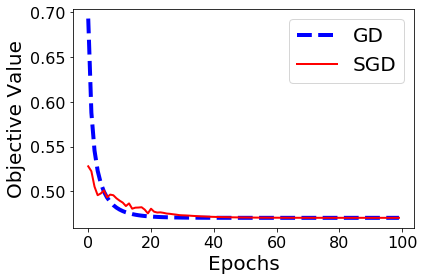

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 4))

epochs_gd = range(len(objvals_gd))
epochs_sgd = range(len(objvals_sgd))

line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=4)
line1, = plt.plot(epochs_sgd, objvals_sgd, '-r', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1], ['GD', 'SGD'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_gd_sgd.pdf', format='pdf', dpi=1200)

#### Prediction

In [14]:
# Predict class label
# Inputs:
#     w: d-by-1 matrix
#     X: m-by-d matrix
# Return:
#     f: m-by-1 matrix, the predictions
def predict(w, X):
    xw = numpy.dot(X, w)
    f = numpy.sign(xw)
    return f

In [15]:
# evaluate training error
f_train = predict(w, x_train)
diff = numpy.abs(f_train - y_train) / 2
error_train = numpy.mean(diff)
print('Training classification error is ' + str(error_train))

Training classification error is 0.2203125


In [16]:
# evaluate test error
f_test = predict(w, x_test)
diff = numpy.abs(f_test - y_test) / 2
error_test = numpy.mean(diff)
print('Test classification error is ' + str(error_test))

Test classification error is 0.25


#### 6. Mini-batch SGD

#### 6.1 Objective Value and Gradient

In [17]:
# Calculate the objective Q_I and the gradient of Q_I
# Inputs:
#     w: d-by-1 matrix
#     xi: b-by-d matrix
#     yi: b-by-1 matrix
#     lam: scalar, the regularization parameter
#     b: integer, the batch size
# Return:
#     obj: scalar, the objective Q_i
#     g: d-by-1 matrix, gradient of Q_i
def mb_stochastic_objective_gradient(w, xi, yi, lam, b):
    n, d = xi.shape
    yx = numpy.multiply(yi, xi) #  b-by-d matrix
    yxw = numpy.dot(yx, w) # b-by-1 matrix
    
    # calculate objective function Q_i
    loss = (1/b) * (numpy.sum(numpy.log(1 + numpy.exp(-yxw)))) # scalar
    reg = lam / 2 * numpy.sum(w * w) # scalar
    obj = loss + reg
    
    # calculate stochastic gradient
    g_loss_vec = -(numpy.divide(yx , (1 + numpy.exp(yxw)))) # b-by-d matrix
    g_loss = ((1/b)*(numpy.sum(g_loss_vec, axis=0))).reshape(d,1) # d-by-1 matrix
    g = g_loss + lam * w 
    
    return obj, g

#### 6.2. Implement mini-batch SGD

In [20]:
# Mini-Batch SGD for solving logistic regression
# Inputs:
#     x: n-by-d matrix
#     y: n-by-1 matrix
#     lam: scalar, the regularization parameter
#     b: integer, the batch size
#     stepsize: scalar
#     max_epoch: integer, the maximal epochs
#     w: d-by-1 matrix, initialization of w
# Return:
#     w: the solution
#     objvals: record of each iteration's objective value
def mb_sgd(x, y, lam, b, stepsize, max_epoch=100, w=None):

    n, d = x.shape
    objvals = numpy.zeros(max_epoch) # store the objective values
    if w is None:
        w = numpy.zeros((d, 1)) # zero initialization
    
    for t in range(max_epoch):
        # randomly shuffle the samples
        rand_indices = numpy.random.permutation(n)
        x_rand = x[rand_indices, :]
        y_rand = y[rand_indices, :]
        
        objval = 0 # accumulate the objective values
        for i in range(int(n/b)):
            xi = x_rand[i*b : (i+1)*b, :] # b-by-d matrix
            yi = y_rand[i*b : (i+1)*b, :] # b-by-1 matrix
            obj, g = mb_stochastic_objective_gradient(w, xi, yi, lam,b)
            objval += obj
            w -= stepsize * g
        stepsize *= 0.9 # decrease step size
        objval /= (n/b)
        objvals[t] = objval
        print('Objective value at epoch t=' + str(t) + ' is ' + str(objval))
    
    return w, objvals

#### 6.3. Run MB-SGD

In [21]:
# MB-SGD with batch size b=8
lam = 1E-6 # do not change
b = 8 # do not change
stepsize = 0.1 # you must tune this parameter

w, objvals_mbsgd8 = mb_sgd(x_train, y_train, lam, b, stepsize)

Objective value at epoch t=0 is 0.543445995207071
Objective value at epoch t=1 is 0.4854778211419905
Objective value at epoch t=2 is 0.4782764389444325
Objective value at epoch t=3 is 0.47565090559589035
Objective value at epoch t=4 is 0.4756687852384661
Objective value at epoch t=5 is 0.4742395084946642
Objective value at epoch t=6 is 0.47446214696201283
Objective value at epoch t=7 is 0.47426643946212466
Objective value at epoch t=8 is 0.4738838855671331
Objective value at epoch t=9 is 0.47325805468183485
Objective value at epoch t=10 is 0.47365250409895837
Objective value at epoch t=11 is 0.4729044712353209
Objective value at epoch t=12 is 0.4724399312853758
Objective value at epoch t=13 is 0.47256423660343866
Objective value at epoch t=14 is 0.472079702965457
Objective value at epoch t=15 is 0.4718210357883854
Objective value at epoch t=16 is 0.47182420084302146
Objective value at epoch t=17 is 0.4716828890736446
Objective value at epoch t=18 is 0.4714996902304476
Objective value a

In [26]:
# MB-SGD with batch size b=64
lam = 1E-6 # do not change
b = 64 # do not change
stepsize = 0.9 # you must tune this parameter

w, objvals_mbsgd64 = mb_sgd(x_train, y_train, lam, b, stepsize)

Objective value at epoch t=0 is 0.5439481786113016
Objective value at epoch t=1 is 0.483974142089155
Objective value at epoch t=2 is 0.4785135064453444
Objective value at epoch t=3 is 0.4752684868144799
Objective value at epoch t=4 is 0.47894136836987994
Objective value at epoch t=5 is 0.4746792332958115
Objective value at epoch t=6 is 0.47474624220425055
Objective value at epoch t=7 is 0.47458971351673485
Objective value at epoch t=8 is 0.4745727994411098
Objective value at epoch t=9 is 0.47407868934856784
Objective value at epoch t=10 is 0.4731683470640247
Objective value at epoch t=11 is 0.4732049806085225
Objective value at epoch t=12 is 0.4730886710152039
Objective value at epoch t=13 is 0.47202605527751357
Objective value at epoch t=14 is 0.4725316721339879
Objective value at epoch t=15 is 0.4718796772186794
Objective value at epoch t=16 is 0.4715660746271862
Objective value at epoch t=17 is 0.4720040479589221
Objective value at epoch t=18 is 0.47169783081876726
Objective value a

#### 7. Plot and compare GD, SGD, and MB-SGD

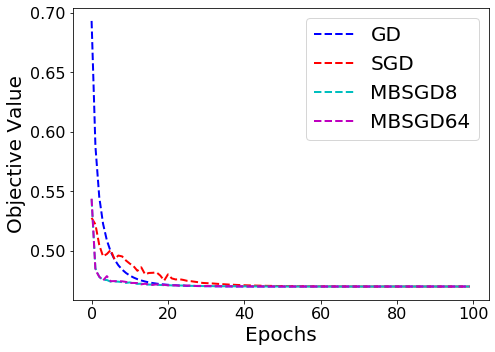

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(7, 5))

epochs_gd = range(len(objvals_gd))
epochs_sgd = range(len(objvals_sgd))
epochs_mbsgd8 = range(len(objvals_mbsgd8))
epochs_mbsgd64 = range(len(objvals_mbsgd64))

line0, = plt.plot(epochs_gd, objvals_gd, '--b', LineWidth=2)
line1, = plt.plot(epochs_sgd, objvals_sgd, '--r', LineWidth=2)
line2, = plt.plot(epochs_mbsgd8, objvals_mbsgd8, '--c', LineWidth=2)
line3, = plt.plot(epochs_mbsgd64, objvals_mbsgd64, '--m', LineWidth=2)
plt.xlabel('Epochs', FontSize=20)
plt.ylabel('Objective Value', FontSize=20)
plt.xticks(FontSize=16)
plt.yticks(FontSize=16)
plt.legend([line0, line1, line2, line3], ['GD', 'SGD', 'MBSGD8', 'MBSGD64'], fontsize=20)
plt.tight_layout()
plt.show()
fig.savefig('compare_4_algos.pdf', format='pdf', dpi=1200)

### As can be observed from the above plot, the four algorithms converge towards the same objective value. 